This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from pickle import dump
%matplotlib notebook

# 1. EDA

## 1.x. Domain Understanding

In [2]:
heart = pd.read_csv('datasets/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 1.xx. Correlation Analysis

In [6]:
heart_corr = heart.corr()
heart_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


## 1.xxx. Data Visualization

<IPython.core.display.Javascript object>


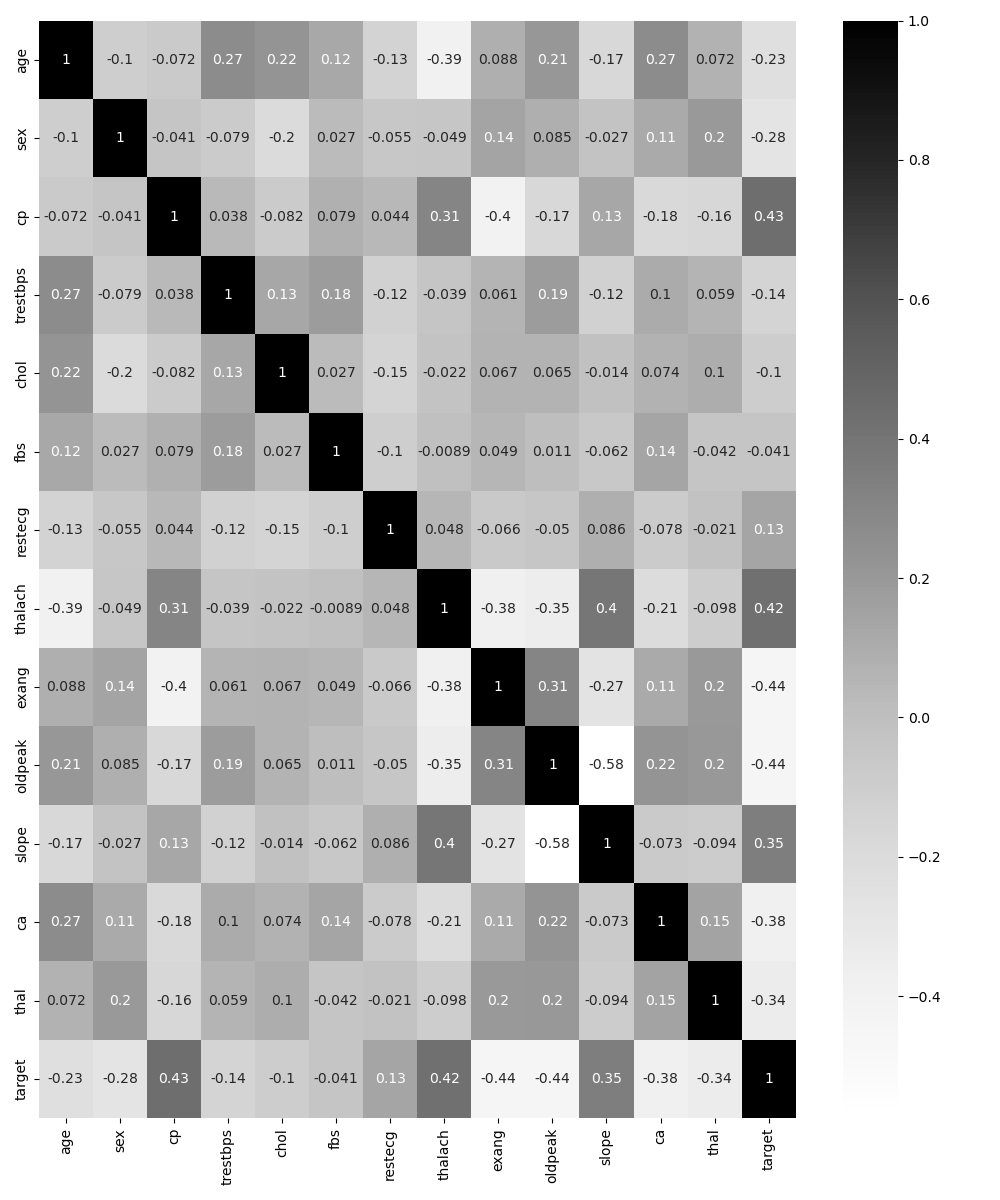

In [7]:
plt.figure(figsize=(10, 12))
sns.heatmap(heart_corr, annot=True, cmap='Greys');
plt.tight_layout()

<IPython.core.display.Javascript object>


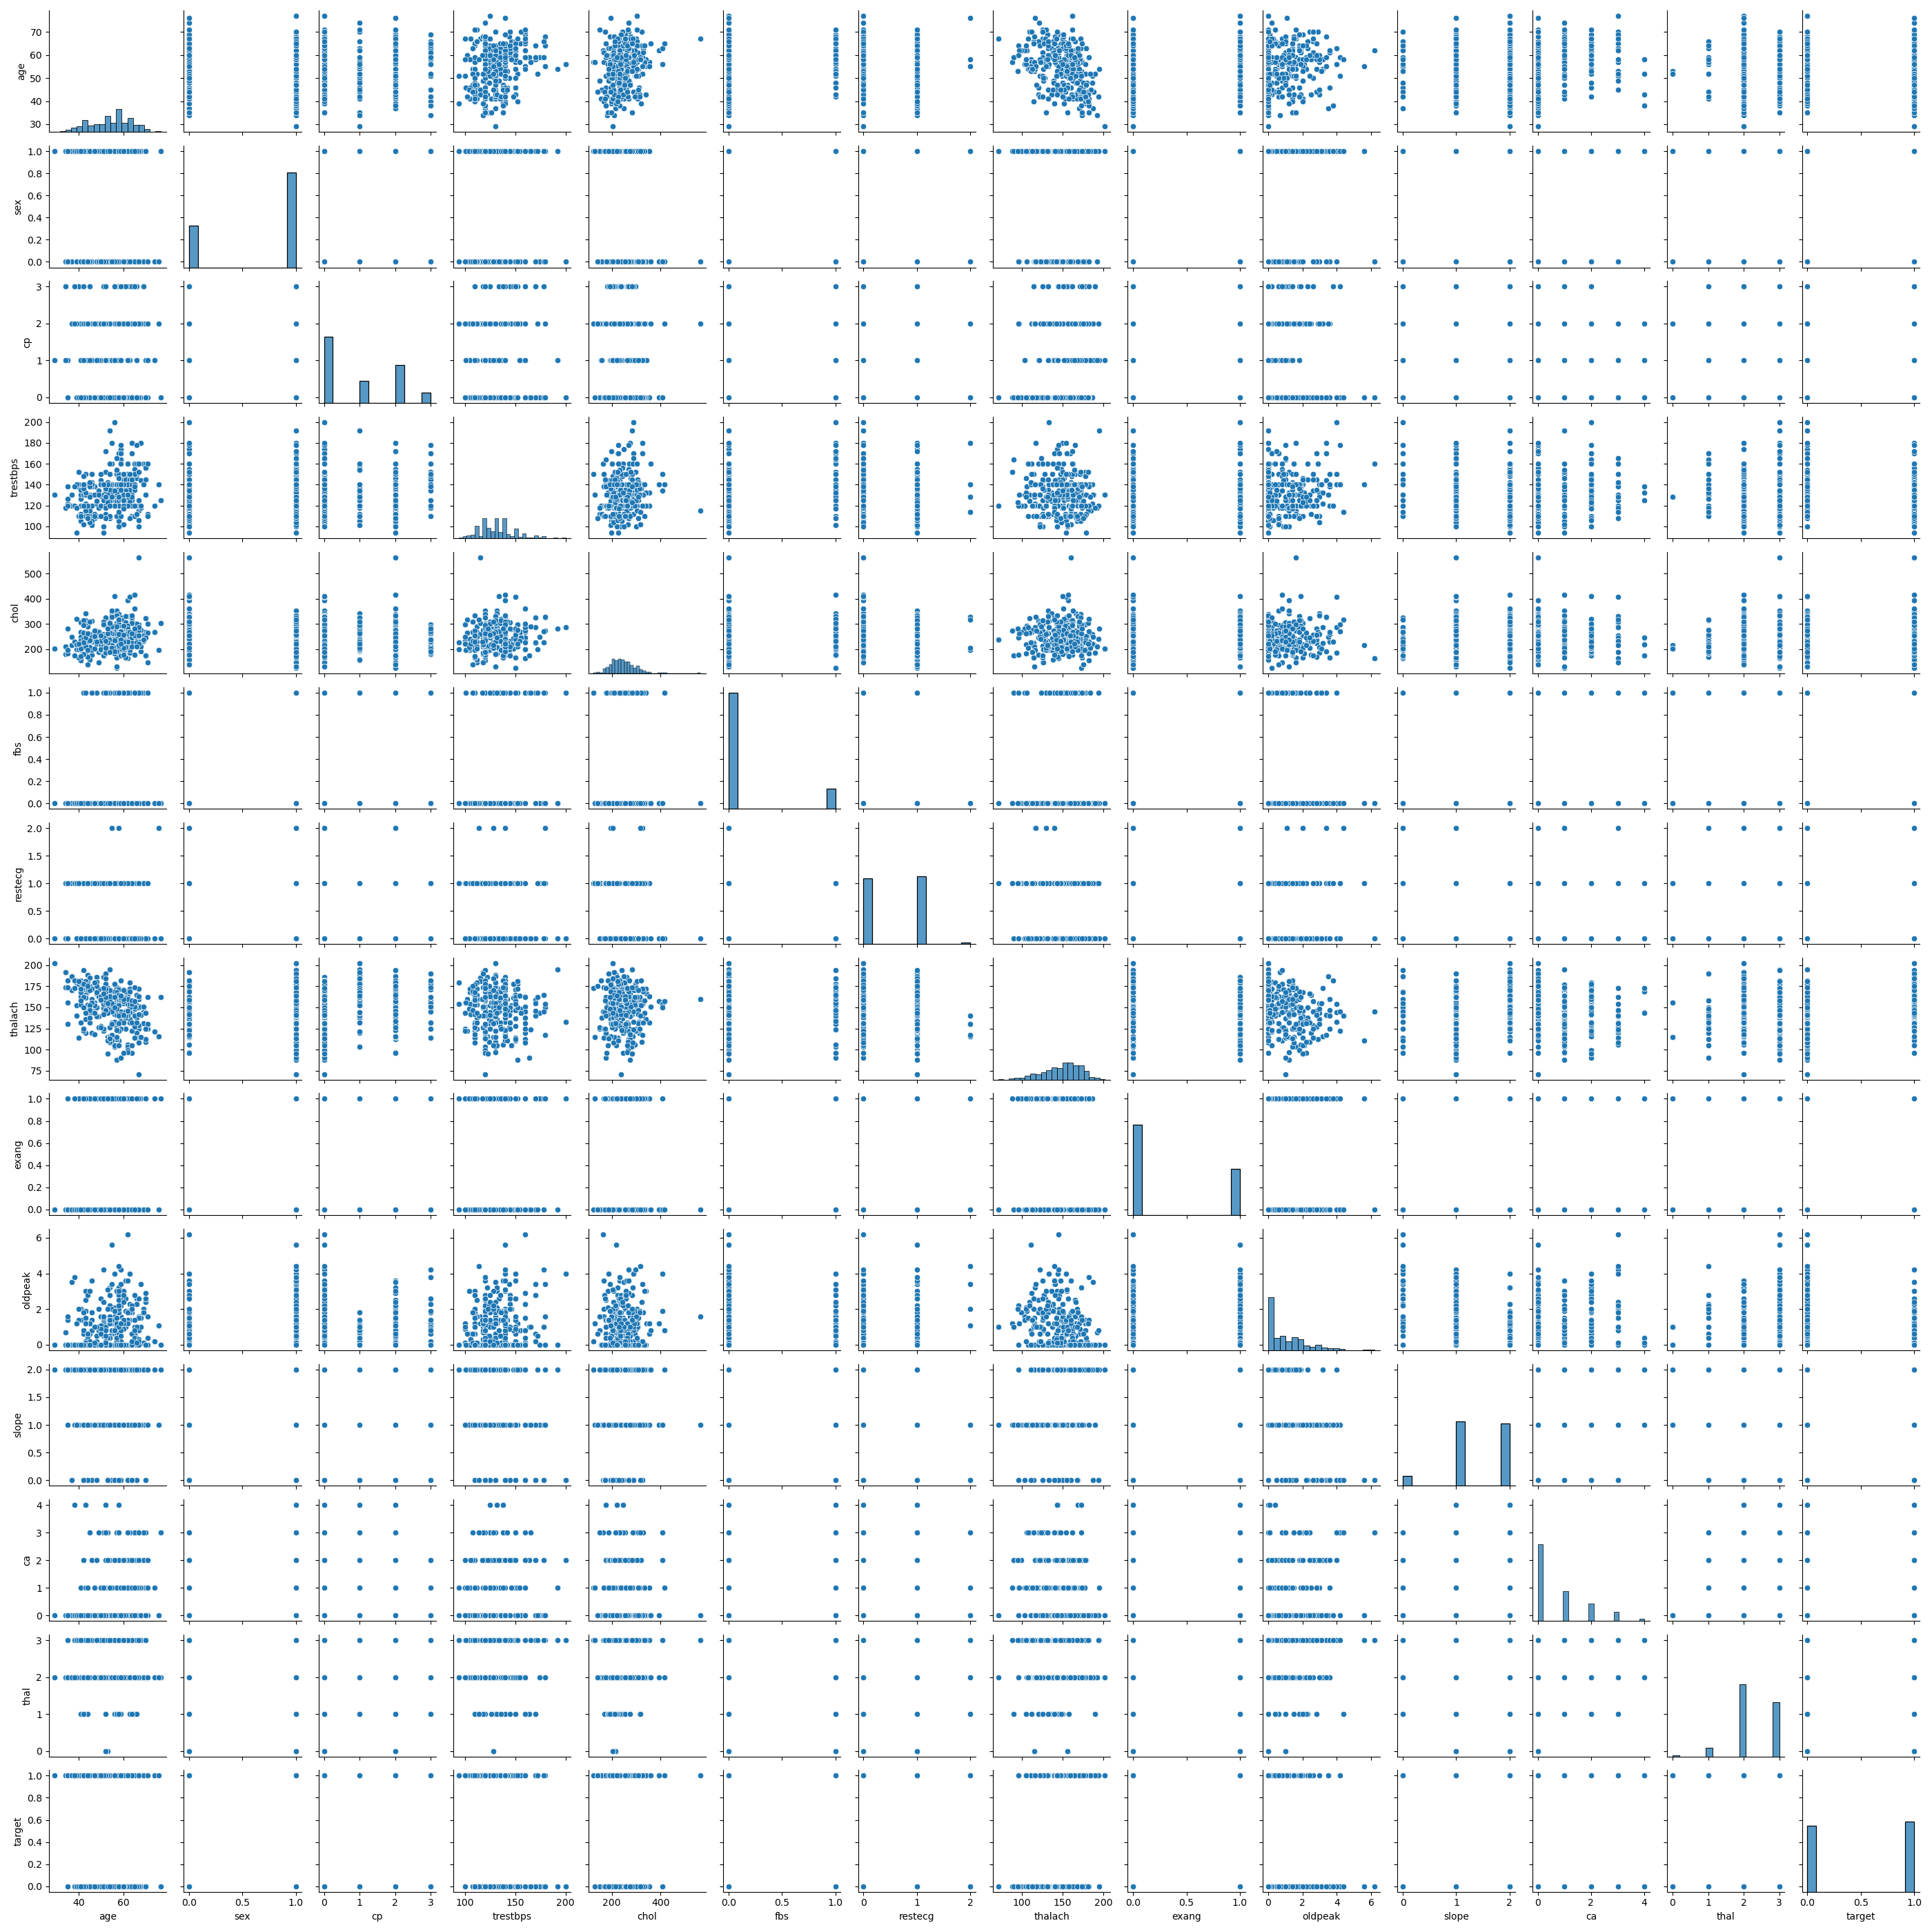

In [8]:
sns.pairplot(data=heart, height=2);
plt.tight_layout()

<IPython.core.display.Javascript object>


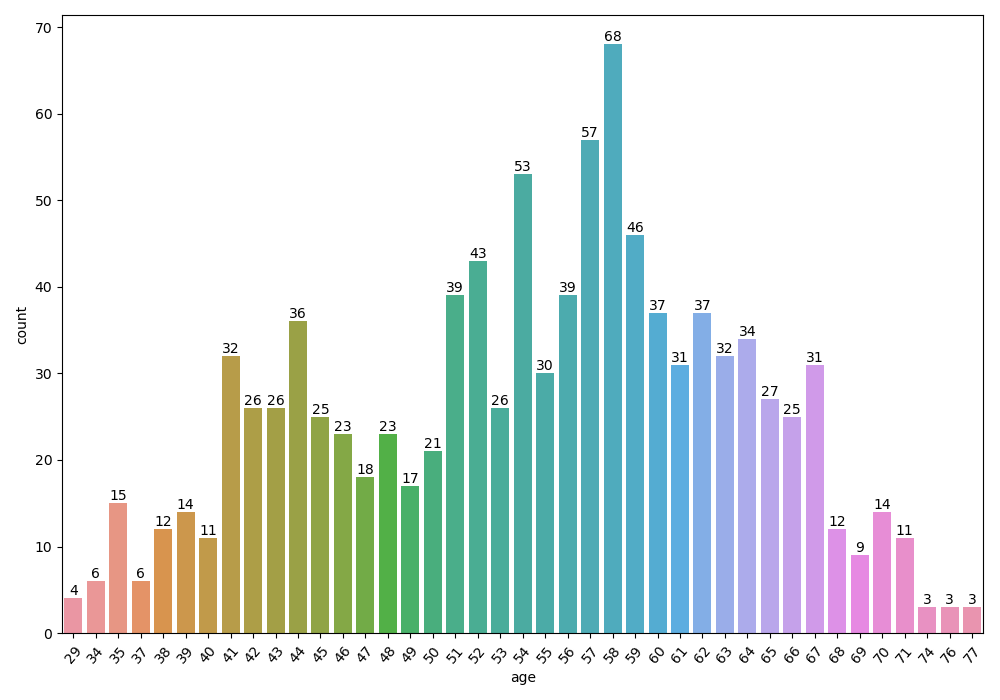

In [33]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.xticks(rotation=50)
bar = sns.countplot(data=heart, x='age')
for c in bar.containers:
    plt.bar_label(container=c, label_type='edge')
plt.tight_layout()

<IPython.core.display.Javascript object>


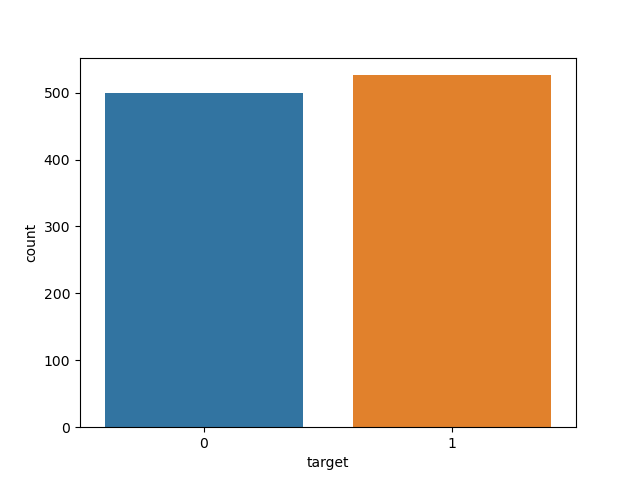

<Axes: xlabel='target', ylabel='count'>

In [35]:
plt.figure()
sns.countplot(data=heart, x='target')

# 2. Data Preprocessing

## 2.x. Data Transformation

In [11]:
X = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values

In [12]:
ss = StandardScaler()
X = ss.fit_transform(X)

# 3. Data Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
knn_clf = KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [15]:
params = {
    'n_neighbors' : range(2, 11, 1),
    'metric' : ['minkowski'],
    'p' : [1, 2],
    'weights' : ['uniform', 'distance'] 
}
gsh = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1',
                  n_jobs=-1, cv=4, return_train_score=True, verbose=10, refit=True)

In [16]:
gsh.fit(X, y)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 4/4; 1/36] START metric=minkowski, n_neighbors=2, p=1, weights=uniform......
[CV 4/4; 1/36] END metric=minkowski, n_neighbors=2, p=1, weights=uniform;, score=(train=0.991, test=0.929) total time=   0.0s
[CV 4/4; 3/36] START metric=minkowski, n_neighbors=2, p=2, weights=uniform......
[CV 4/4; 3/36] END metric=minkowski, n_neighbors=2, p=2, weights=uniform;, score=(train=0.990, test=0.920) total time=   0.0s
[CV 2/4; 5/36] START metric=minkowski, n_neighbors=3, p=1, weights=uniform......
[CV 2/4; 5/36] END metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=(train=0.990, test=0.915) total time=   0.0s
[CV 1/4; 6/36] START metric=minkowski, n_neighbors=3, p=1, weights=distance.....
[CV 1/4; 6/36] END metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=(train=1.000, test=0.985) total time=   0.0s
[CV 1/4; 7/36] START metric=minkowski, n_neighbors=3, p=2, weights=uniform......
[CV 1/4; 7/36] END metric=mi

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': range(2, 11),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1', verbose=10)

In [17]:
gsh.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [18]:
gsh.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [19]:
gsh.best_score_

0.997191011235955

# 4. Data Evaluation

In [20]:
print('R-Squared Score (Training) : {}'.format(knn_clf.score(X_train, y_train)))
print('R-Squared Score (Test) : {}'.format(knn_clf.score(X_test, y_test)))

R-Squared Score (Training) : 1.0
R-Squared Score (Test) : 1.0


In [21]:
predicted = knn_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [22]:
print(confusion_matrix(y_test, predicted))

[[123   0]
 [  0 134]]


</br> </br>
Calculate the Normalized Gini coeffecient for our Binary Classification model using the roc_curve and auc metrics

In [23]:
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=predicted)

In [24]:
for item in zip(fpr, tpr, threshold):
    print(f'False Positive Rate in threshold {item[2]} : {item[0]}\
    \nTrue Positive Rate in threshold {item[2]} : {item[1]}\n')

False Positive Rate in threshold 2 : 0.0    
True Positive Rate in threshold 2 : 0.0

False Positive Rate in threshold 1 : 0.0    
True Positive Rate in threshold 1 : 1.0

False Positive Rate in threshold 0 : 1.0    
True Positive Rate in threshold 0 : 1.0



In [25]:
roc_auc = auc(x=fpr, y=tpr)

In [26]:
roc_auc

1.0

In [27]:
roc_auc0_5 = 0.5
gini_norm = (roc_auc - roc_auc0_5) / (1 - roc_auc0_5)
print(gini_norm)

1.0


## 2.xx. Data Manipulation

In [28]:
new_instances = X
np.random.shuffle(new_instances)

In [29]:
y_pred = gsh.predict(new_instances)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [30]:
categories, counts = np.unique(y_pred, return_counts=True)
for item in zip(categories, counts):
    print(item)

(0, 499)
(1, 526)


# 5. Freezing the model

In [31]:
with open('models/Heart Patient Prediction/knn_clf.model', mode='wb') as f:
    dump(gsh, f)
    f.close()